In [28]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
datadir = "../data"
pdbdir = "../data/pdb"
print(os.listdir(datadir))
train_df_single = pd.read_csv(os.path.join(datadir, "single_muts_train.csv"))
train_df_multi = pd.read_csv(os.path.join(datadir, "multiple_muts_train.csv"))

test_df_single = pd.read_csv(os.path.join(datadir, "single_muts_test.csv"))
test_df_multi = pd.read_csv(os.path.join(datadir, "multiple_muts_test.csv"))

['features', 'multiple_muts_test.csv', 'multiple_muts_train.csv', 'pdb', 'single_muts_test.csv', 'single_muts_train.csv']


In [24]:
pdb_files = []
for base, dirs, files in os.walk(pdbdir):
    if len(dirs) > 0:
        print(dirs)
        continue
    if base.find("rd") < 0:
        continue
    for file in files:
        name = file.split(".")[0]
        data = {
            "name": name,
            "path": os.path.join(base, file),
        }
        pdb_files.append(data)

pdb_df = pd.DataFrame(pdb_files)

['rd1', 'rd2', 'rd3', 'rd4']


In [37]:
pdb_names = set(pdb_df.name.drop_duplicates().values)

In [30]:
train_df_single['wt_name'] = train_df_single.name.apply(lambda x: x.split(".")[0])
train_df_multi['wt_name'] = train_df_multi.name.apply(lambda x: x.split(".")[0])

test_df_single['wt_name'] = test_df_single.name.apply(lambda x: x.split(".")[0])
test_df_multi['wt_name'] = test_df_multi.name.apply(lambda x: x.split(".")[0])

In [98]:
orphans = train_df_single[~train_df_single.wt_name.isin(pdb_names)]

In [94]:
from prody import parsePDB
from Bio.PDB import * 
from Bio.SeqUtils import seq1

def read_structure(name, path):
    parser = PDBParser()
    #pdb = parsePDB(pdb_df.path.values[0])
    pdb = parser.get_structure(name, path)
    sequence = seq1("".join([res.resname for res in pdb.get_residues()]))
    return sequence

In [95]:
# zip(pdb.getResnums(), pdb.getResnames())
from tqdm import tqdm_notebook
sequences = []
for name, path in tqdm_notebook(pdb_df.values):
    sequence = read_structure(name, path)
    sequences.append({
        "name": name,
        "sequence": sequence
    })

  0%|          | 0/16463 [00:00<?, ?it/s]

In [96]:
df = pd.DataFrame(sequences)

In [222]:
df

,name,sequence
0,EEHEE_rd1_0001,QEVNSGTQTYKNASPEEAERIARKAGATTWTEKGNKWEIRI
1,EEHEE_rd1_0002,YELEVGNYRYRADDPEQLKEEAKKVGARDVQTDGNNFKVRG
2,EEHEE_rd1_0003,WRVHFRGETYTADTEDDAKQLAKDAGARRIESSNGEVRVEL
3,EEHEE_rd1_0004,YTIEENGEKYTFRTRDEAEEWARRQGAQTVETRGTELRSRA
4,EEHEE_rd1_0005,VELEDNGRRVEATSTQEARDRAKKEGATTWTESGTRIEVRG
...,...,...
16458,HHH_rd4_0996,DEEQKKQVRKLLRSGVDDEQVVKYLKRQGVSEEEARRIVRKAK
16459,HHH_rd4_0997,DEERLKEEIEKAQRNNDAERVKKLLERLGVDPREVEEVYQRLS
16460,HHH_rd4_0998,EEKLERFAREVQKRGLSDEQIEEELKRRGVDDEQVKEVKRLVK
16461,HHH_rd4_0999,EEEIRKEIKKLRDNGVDDEQIKEILRRKGVDPRQVDKVIREVK


In [102]:
orphans.wt_name.unique()

array(['EHEE_0882', 'HHH_0142'], dtype=object)

In [188]:
orphans[orphans.wt_name=="EHEE_0882"]

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name
3,3,EHEE_0882.pdb_E2I,GSSQITIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59,EHEE_0882
13,13,EHEE_0882.pdb_K34H,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNHWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.57,EHEE_0882
40,40,EHEE_0882.pdb_K17P,GSSQETIEVEDEEEARRVAPELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,0.52,EHEE_0882
47,47,EHEE_0882.pdb_R39Y,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHYT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.56,EHEE_0882
58,58,EHEE_0882.pdb_E11H,GSSQETIEVEDEEHARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.65,EHEE_0882
...,...,...,...,...,...,...
8521,8521,EHEE_0882.pdb_R39E,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHET,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.26,EHEE_0882
8523,8523,EHEE_0882.pdb_N33S,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGSKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59,EHEE_0882
8531,8531,EHEE_0882.pdb_R14K,GSSQETIEVEDEEEARKVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.64,EHEE_0882
8540,8540,EHEE_0882.pdb_V26W,GSSQETIEVEDEEEARRVAKELRKKGYEWKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.25,EHEE_0882


In [228]:
wt_df = pd.DataFrame([
    {"name": "EHEE_0882", "sequence": "GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT", "real": "EHEE_rd1_0882"},
    {"name": "HHH_0142", "sequence": "RKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL", "real": "HHH_rd1_0142"}
])

In [115]:
wt_df

,name,sequence,real
0,EHEE_0882,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,NaN
1,HHH_0142,RKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL,HHH_rd1_0142


In [113]:
df[df.sequence == "RKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL"]

,name,sequence
3294,HHH_rd1_0142,RKWEEIAERLREEFNINPEEAREAVEKAGGNEEEARRIVKKRL


In [123]:
candidates = set(orphans[orphans.wt_name=="EHEE_0882"].sequence.values)

In [125]:
df[df.sequence.isin(candidates)]

,name,sequence


In [139]:
#df[df.name=="EHEE_r4_0882"]

In [130]:
# check train multi
train_df_multi[~train_df_multi.wt_name.isin(pdb_names)]

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name


In [132]:
test_df_single[~test_df_single.wt_name.isin(pdb_names)].wt_name.drop_duplicates()

32    EHEE_0882
37     HHH_0142
Name: wt_name, dtype: object

In [133]:
test_df_multi[~test_df_multi.wt_name.isin(pdb_names)]

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name


In [144]:
wt_names = set(
    list(train_df_single.wt_name.drop_duplicates())+list(test_df_single.wt_name.drop_duplicates()) + 
    list(train_df_multi.wt_name.drop_duplicates())+list(test_df_multi.wt_name.drop_duplicates())
)

In [236]:
df_filtered = df.loc[(df.name.isin(wt_names)) | (df.name == "HHH_rd1_0142") | (pdb_df.name == "EHEE_rd1_0882")]

In [237]:
len(wt_names)

12443

In [238]:
df_filtered.loc[df_filtered.name == "HHH_rd1_0142", "name"] = "HHH_0142"
df_filtered.loc[df_filtered.name == "EHEE_rd1_0882", "name"] = "EHEE_0882"

In [239]:
df_filtered

,name,sequence
0,EEHEE_rd1_0001,QEVNSGTQTYKNASPEEAERIARKAGATTWTEKGNKWEIRI
1,EEHEE_rd1_0002,YELEVGNYRYRADDPEQLKEEAKKVGARDVQTDGNNFKVRG
2,EEHEE_rd1_0003,WRVHFRGETYTADTEDDAKQLAKDAGARRIESSNGEVRVEL
3,EEHEE_rd1_0004,YTIEENGEKYTFRTRDEAEEWARRQGAQTVETRGTELRSRA
4,EEHEE_rd1_0005,VELEDNGRRVEATSTQEARDRAKKEGATTWTESGTRIEVRG
...,...,...
12458,HHH_rd3_0246,RPEQEELKKLAKKLNLDPREAEEAYDKANGNLEEAKKILKKLA
12459,HHH_rd3_0247,TPELKKEVQKALKNGVSPDEVEKYLKELGVDPEEAKKLAKYAE
12460,HHH_rd3_0248,PEEEAKRRAEEALDRGDEDKARKILEKAGISPEEAQKVIDKLR
12461,HHH_rd3_0249,SDKEKEAEELLKRANGDVETAKEIAKRRGNEEVARLAQEIWEK


In [240]:
pdb_df = pdb_df.loc[pdb_df.name.isin(wt_names) | (pdb_df.name == "HHH_rd1_0142") | (pdb_df.name == "EHEE_rd1_0882")]

In [241]:
pdb_df.loc[pdb_df.name == "HHH_rd1_0142", "name"] = "HHH_0142"
pdb_df.loc[pdb_df.name == "EHEE_rd1_0882", "name"] = "EHEE_0882"

In [242]:
pdb_df_merged = pdb_df.merge(df_filtered, on="name")
pdb_df_merged.to_csv("../data/pdb_names.csv", index=None) # we'll need to make contact maps from these files

In [243]:
target_dir = "../data/pdb/contact_maps"
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

In [187]:
for name, path in pdb_df.values:
    break

In [247]:
#pdb_df_merged.name
test_df_single[~test_df_single.wt_name.isin(pdb_df_merged.name)]

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name


In [200]:
# test_df_single[test_df_single.wt_name=="EHEE_0882"]
merged = train_df_single.merge(pdb_df_merged, left_on="wt_name", right_on="name")


In [207]:
for s1, s2 in merged[["sequence_x", "sequence_y"]].values:
    print(len(s1), len(s2))
    break

43 40


In [230]:
np.sum([a != b for a, b in zip(s1[3:], s2)])

1

In [232]:
pdb_df_merged[pdb_df_merged.sequence.apply(len) < 43].head()

,name,path,sequence
0,EEHEE_rd1_0001,../data/pdb/rd1/EEHEE_rd1_0001.pdb,QEVNSGTQTYKNASPEEAERIARKAGATTWTEKGNKWEIRI
1,EEHEE_rd1_0002,../data/pdb/rd1/EEHEE_rd1_0002.pdb,YELEVGNYRYRADDPEQLKEEAKKVGARDVQTDGNNFKVRG
2,EEHEE_rd1_0003,../data/pdb/rd1/EEHEE_rd1_0003.pdb,WRVHFRGETYTADTEDDAKQLAKDAGARRIESSNGEVRVEL
3,EEHEE_rd1_0004,../data/pdb/rd1/EEHEE_rd1_0004.pdb,YTIEENGEKYTFRTRDEAEEWARRQGAQTVETRGTELRSRA
4,EEHEE_rd1_0005,../data/pdb/rd1/EEHEE_rd1_0005.pdb,VELEDNGRRVEATSTQEARDRAKKEGATTWTESGTRIEVRG


In [214]:
parsePDB("../data/pdb/rd1/EEHEE_rd1_0001.pdb").numResidues()

@> 648 atoms and 1 coordinate set(s) were parsed in 0.01s.


41

In [252]:
# !cat ../data/pdb/rd1/EEHEE_rd1_0001.pdb


In [250]:
pdb_df.head()

,name,path
0,EEHEE_rd1_0001,../data/pdb/rd1/EEHEE_rd1_0001.pdb
1,EEHEE_rd1_0002,../data/pdb/rd1/EEHEE_rd1_0002.pdb
2,EEHEE_rd1_0003,../data/pdb/rd1/EEHEE_rd1_0003.pdb
3,EEHEE_rd1_0004,../data/pdb/rd1/EEHEE_rd1_0004.pdb
4,EEHEE_rd1_0005,../data/pdb/rd1/EEHEE_rd1_0005.pdb


In [227]:
df[df.sequence == "GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT"[3:]]

,name,sequence
2034,EHEE_rd1_0882,QETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT


## Conclusions
1. many pdb files have 1 to 3 residues (mostly from n-terminus) missing in comparison with our train and test data.
2. we can still use these structures to build contact maps, but they will vary in size.
3. We can fill the gaps in these maps with zeros (using offset information)
4. For contact map we can add mask layer, which has zeros at positions (both horisontal and vertical) where aminoacids are mutated and 1 - in remaining positions
5. After that we can use resnet or any other SOTA cv architecture.

In [257]:
merged = train_df_single.merge(pdb_df_merged, left_on="wt_name", right_on="name")


In [258]:
for name, s1, s2 in merged[["wt_name", 'sequence_x', "sequence_y"]].values:
    offset = 
    if len(s1) != len(s2):
        offset = 
        
    m = len(s1)
    break

In [260]:
len(s1)

43

In [348]:
from collections import Counter

consensuses = []
ds = pd.concat([train_df_single, train_df_multi, test_df_single, test_df_multi], ignore_index=True)
names = ds.wt_name.drop_duplicates()
for name in names:
    ids = ds.wt_name == name
    row = ds.loc[ids, "sequence"].values
    wt = [
        sorted(Counter(xs).items(), key=lambda x: -x[1])[0][0] 
        for xs in zip(*ds.loc[ids, "sequence"].apply(list).values)
    ]
    consensuses.append({
        "wt_name": name,
        "wt_sequence": "".join(wt)
    })

In [349]:
df_consensuses = pd.DataFrame(consensuses).drop_duplicates()
df_consensuses.to_csv("../data/wt_sequences.csv", index=None)

In [350]:
df_consensuses.head()  # now we know wt sequences (as they can be deduced from datasets).
# we need to deduce it only because the data is dirty and missing some information

,wt_name,wt_sequence
0,EHEE_rd2_0005,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR
1,HHH_rd2_0134,SKDEAQREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG
2,EHEE_0882,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT
3,EEHEE_rd3_1716,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE
4,EEHEE_rd3_1498,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH


In [351]:
df_merged_new = pdb_df_merged.merge(df_consensuses, left_on="name", right_on="wt_name", how="left")

In [356]:
for name, s, wt in tqdm_notebook(df_merged_new[["name", 'sequence', "wt_sequence"]].values):
    offset = len(wt) - len(s)
    pos = [(offset+i, a, b) for i, (a, b) in enumerate(zip(wt[offset:], s)) if a != b]
    if len(pos) > 10:
        continue
    break

  0%|          | 0/12441 [00:00<?, ?it/s]

In [357]:
[(offset+i, a, b) for i, (a, b) in enumerate(zip(wt[offset:], s)) if a != b]

[(5, 'D', 'E'), (24, 'R', 'K')]

In [359]:
ds[['wt_name', 'sequence']]

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name
0,0,EHEE_rd2_0005.pdb_V26L,GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.72,EHEE_rd2_0005
1,1,HHH_rd2_0134.pdb_R22D,SKDEAQREAERAIRSGNKEEADRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.22,HHH_rd2_0134
2,2,HHH_rd2_0134.pdb_Q6K,SKDEAKREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.20,HHH_rd2_0134
3,3,EHEE_0882.pdb_E2I,GSSQITIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59,EHEE_0882
4,4,EEHEE_rd3_1716.pdb_A26R,TEVHLGDIKLKYPNPEQAKKAAEKLRQKYNLTWTVIGDYVKIE,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.88,EEHEE_rd3_1716
...,...,...,...,...,...,...
47169,7294,EEHEE_rd3_0638.pdb,TQVEFNGTTYQASSQEEAKKVAKKAAKIWNLTVHIHGDTIKLT,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.71,EEHEE_rd3_0638
47170,7295,HEEH_rd3_1271.pdb_buryD,PQEAIKAAQIAEKKGLKTVTVGNYTVTVSSPEEDQKVIKKLKK,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.20,HEEH_rd3_1271
47171,7296,HEEH_rd3_1368.pdb_PG_hp,DPREEAQRLIKSIKRGNKLKAEKRARVEQPTAVTELVNEIEKE,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,-0.38,HEEH_rd3_1368
47172,7297,EEHEE_rd3_0171.pdb_buryD,KTDHVNGKTFHFDNPEAAQKAAEKAAQKDGLTVHEKNGHLKVT,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.12,EEHEE_rd3_0171


In [363]:
train_df_single

,Unnamed: 0,name,sequence,secondary_structure,stabilityscore,wt_name
0,0,EHEE_rd2_0005.pdb_V26L,GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.72,EHEE_rd2_0005
1,1,HHH_rd2_0134.pdb_R22D,SKDEAQREAERAIRSGNKEEADRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.22,HHH_rd2_0134
2,2,HHH_rd2_0134.pdb_Q6K,SKDEAKREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.20,HHH_rd2_0134
3,3,EHEE_0882.pdb_E2I,GSSQITIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59,EHEE_0882
4,4,EEHEE_rd3_1716.pdb_A26R,TEVHLGDIKLKYPNPEQAKKAAEKLRQKYNLTWTVIGDYVKIE,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.88,EEHEE_rd3_1716
...,...,...,...,...,...,...
8545,8545,HHH_rd2_0134.pdb_Y30N,SKDEAQREAERAIRSGNKEEARRILEEAGNSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.13,HHH_rd2_0134
8546,8546,EHEE_rd2_0005.pdb_W35E,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYEEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,0.44,EHEE_rd2_0005
8547,8547,HEEH_rd3_0872.pdb_A35T,TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQTIEYLKKAY,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.64,HEEH_rd3_0872
8548,8548,EEHEE_rd3_0037.pdb_E17S,TTIKVNGQEYTVPLSPSQAAKAAKKRWPDYEVQIHGNTVKVTR,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.68,EEHEE_rd3_0037


In [386]:
merged = train_df_single.merge(pdb_df_merged, left_on="wt_name", right_on="name")
all_offsets = []
for wt_name, s1, s2 in merged[["wt_name", "sequence_x", "sequence_y"]].values:
    offset = len(s1) - len(s2)
    mutations = [i+offset for i, (a, b) in enumerate(zip(s1[offset:], s2)) if a!=b]
    all_offsets.append({
        "mutations": mutations,
        "n_mutations": len(mutations),
        "offset": offset,
        "wt_name": wt_name,
        "s1": s1,
        "s2": s2
    })
    #break
df = pd.DataFrame(all_offsets)

In [388]:
df[df.n_mutations!=1] # note that there are positions in train dataset without mutations!

,mutations,n_mutations,offset,wt_name,s1,s2
47,[],0,3,EHEE_rd2_0005,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR,TTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYWEVEVR
1259,[],0,3,EHEE_0882,GSSQETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,QETIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT
1778,[],0,0,EEHEE_rd3_1716,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE,TEVHLGDIKLKYPNPEQAKKAAEKLAQKYNLTWTVIGDYVKIE
2986,[],0,0,EEHEE_rd3_1498,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH,GTLHLNGVTVKVPSLEKAIKAAKKFAKKYNLEVQVHGNTVHVH
3584,[],0,0,EEHEE_rd3_1702,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT,TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLTVTIKNGKITVT
4383,[],0,0,EEHEE_rd3_0037,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR,TTIKVNGQEYTVPLSPEQAAKAAKKRWPDYEVQIHGNTVKVTR
5897,[],0,3,EHEE_rd3_0015,GSSKTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE,KTQYEYDTKEEAQKAYEKFKKQGIPVTITQKNGKWFVQVE
6233,[],0,0,HEEH_rd3_0726,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK,TELKKKLEEALKKGEEVRVKFNGIEIRITSEDAARKAVELLEK
6730,[],0,0,HEEH_rd3_0872,TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQAIEYLKKAY,TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQAIEYLKKAY
7463,[],0,0,HEEH_rd3_0223,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY,TIDEIIKALEQAVKDNKPIQVGNYTVTSADEAEKLAKKLKKEY


In [390]:
merged = test_df_single.merge(pdb_df_merged, left_on="wt_name", right_on="name")
all_offsets = []
for wt_name, s1, s2 in merged[["wt_name", "sequence_x", "sequence_y"]].values:
    offset = len(s1) - len(s2)
    mutations = [i+offset for i, (a, b) in enumerate(zip(s1[offset:], s2)) if a!=b]
    all_offsets.append({
        "mutations": mutations,
        "n_mutations": len(mutations),
        "offset": offset,
        "wt_name": wt_name,
        "s1": s1,
        "s2": s2
    })
    #break
df = pd.DataFrame(all_offsets)

In [396]:
df[df.n_mutations != 1] # there are also several samples without mutations in test set

,mutations,n_mutations,offset,wt_name,s1,s2
679,[],0,0,HEEH_rd2_0779,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK,TLDEARELVERAKKEGTGVDVNGQRFEDWREAERWVREQEKNK
1564,[],0,0,HHH_rd2_0134,SKDEAQREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG,SKDEAQREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG
1793,[],0,0,HHH_rd3_0138,ERRKIEEIAKKLYQSGNPEAARRFLRKAGISEEEIERILQKAG,ERRKIEEIAKKLYQSGNPEAARRFLRKAGISEEEIERILQKAG


In [397]:
merged = train_df_multi.merge(pdb_df_merged, left_on="wt_name", right_on="name")
all_offsets = []
for wt_name, s1, s2 in merged[["wt_name", "sequence_x", "sequence_y"]].values:
    offset = len(s1) - len(s2)
    mutations = [i+offset for i, (a, b) in enumerate(zip(s1[offset:], s2)) if a!=b]
    all_offsets.append({
        "mutations": mutations,
        "n_mutations": len(mutations),
        "offset": offset,
        "wt_name": wt_name,
        "s1": s1,
        "s2": s2
    })
    #break
df = pd.DataFrame(all_offsets)

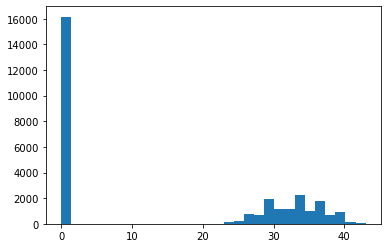

In [407]:
plt.hist(df.n_mutations.values, bins=30);

In [429]:
import MDAnalysis as MDA
import MDAnalysis.analysis.distances as MDAd

def get_contact_map(path):
    structure = MDA.Universe(path)
    primary = structure.select_atoms("protein")
    pgroup = primary.groupby(['resids'])
    groups = list(pgroup)
    n = len(groups)
    matrix = np.zeros((n, n))

    for i, gr in enumerate(groups):
        a = pgroup[gr]
        for j in range(i, n):
            b = pgroup[groups[j]]
            mdist = MDAd.distance_array(a.positions, b.positions)
            distance = mdist.min()
            matrix[i, j] = distance
            if i != j:
                matrix[j, i] = distance
    return matrix

In [433]:
for name, path in tqdm_notebook(pdb_df_merged[["name", "path"]].values):
    save_path = os.path.join(target_dir, name+".npz")
    data = get_contact_map(path)
    np.savez_compressed(save_path, data=data)
    # break

  0%|          | 0/12441 [00:00<?, ?it/s]

'../data/pdb/contact_maps'

In [438]:
pdb_df_merged['cmap_path'] = pdb_df_merged.name.apply(lambda x: os.path.join(target_dir, name + ".npz"))

In [439]:
pdb_df_merged.to_csv("../data/pdb_names_with_cmaps.csv", index=None)